In [2]:
!unzip "/content/archive (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: mnist_png/training/9/1820.png  
  inflating: mnist_png/training/9/18211.png  
  inflating: mnist_png/training/9/18228.png  
  inflating: mnist_png/training/9/18241.png  
  inflating: mnist_png/training/9/18251.png  
  inflating: mnist_png/training/9/1826.png  
  inflating: mnist_png/training/9/18277.png  
  inflating: mnist_png/training/9/18296.png  
  inflating: mnist_png/training/9/183.png  
  inflating: mnist_png/training/9/18350.png  
  inflating: mnist_png/training/9/18355.png  
  inflating: mnist_png/training/9/18374.png  
  inflating: mnist_png/training/9/18377.png  
  inflating: mnist_png/training/9/18382.png  
  inflating: mnist_png/training/9/18387.png  
  inflating: mnist_png/training/9/18401.png  
  inflating: mnist_png/training/9/18405.png  
  inflating: mnist_png/training/9/18415.png  
  inflating: mnist_png/training/9/18437.png  
  inflating: mnist_png/training/9/18441.png  
  inflating: mnist_png/training/9

In [1]:
train_folder_path = "/content/mnist_png/mnist_png/training"
test_folder_path = "/content/mnist_png/mnist_png/testing"

In [2]:
sample_img_path = "/content/mnist_png/mnist_png/testing/0/10.png"

In [3]:
import cv2

In [4]:
img_arr = cv2.imread(sample_img_path)
img_arr.shape

(28, 28, 3)

In [5]:
import numpy as np
mean_pixels = np.mean(img_arr,axis=-1).ravel()
median_pixels = np.median(img_arr,axis=-1).ravel()
max_pixels = np.max(img_arr,axis=-1).ravel()
min_pixels = np.min(img_arr,axis=-1).ravel()
std_pixels = np.std(img_arr,axis=-1).ravel()
twenty_pixels = np.percentile(img_arr,25,axis=-1).ravel()
fifty_pixels = np.percentile(img_arr,50,axis=-1).ravel()
seventy_pixels = np.percentile(img_arr,75,axis=-1).ravel()

In [6]:
full_img_arr = np.concatenate((mean_pixels,median_pixels,max_pixels,min_pixels,std_pixels,twenty_pixels,fifty_pixels,seventy_pixels),axis=-1)
full_img_arr.shape

(6272,)

In [7]:
import os
os.listdir("/content/mnist_png/mnist_png/training")

['2', '5', '7', '1', '0', '8', '4', '6', '9', '3']

In [8]:
os.listdir("/content/mnist_png/mnist_png/training/2")

['7594.png',
 '5250.png',
 '3305.png',
 '39545.png',
 '17992.png',
 '18995.png',
 '40816.png',
 '57899.png',
 '37863.png',
 '16403.png',
 '7326.png',
 '7375.png',
 '28566.png',
 '21024.png',
 '35051.png',
 '4514.png',
 '22397.png',
 '27073.png',
 '39146.png',
 '19891.png',
 '58945.png',
 '45885.png',
 '22688.png',
 '59333.png',
 '11257.png',
 '15887.png',
 '26875.png',
 '52142.png',
 '59122.png',
 '49285.png',
 '59298.png',
 '38261.png',
 '23994.png',
 '54440.png',
 '36462.png',
 '23114.png',
 '41662.png',
 '5436.png',
 '16497.png',
 '55952.png',
 '36573.png',
 '36147.png',
 '13522.png',
 '7920.png',
 '38010.png',
 '3304.png',
 '17555.png',
 '23564.png',
 '51760.png',
 '801.png',
 '41460.png',
 '55193.png',
 '55508.png',
 '21450.png',
 '55157.png',
 '52971.png',
 '161.png',
 '31508.png',
 '32146.png',
 '19587.png',
 '49573.png',
 '13061.png',
 '48621.png',
 '30860.png',
 '190.png',
 '39299.png',
 '4489.png',
 '6425.png',
 '24674.png',
 '59061.png',
 '35347.png',
 '37007.png',
 '41284.p

In [9]:
from tqdm import tqdm
X = []
y = []

for i in tqdm(os.listdir(train_folder_path)):
    for j in os.listdir(os.path.join(train_folder_path,i)):
        img_arr = cv2.imread(os.path.join(train_folder_path,i,j))
        mean_pixels = np.mean(img_arr,axis=-1).ravel()
        median_pixels = np.median(img_arr,axis=-1).ravel()
        max_pixels = np.max(img_arr,axis=-1).ravel()
        min_pixels = np.min(img_arr,axis=-1).ravel()
        std_pixels = np.std(img_arr,axis=-1).ravel()
        twenty_pixels = np.percentile(img_arr,25,axis=-1).ravel()
        fifty_pixels = np.percentile(img_arr,50,axis=-1).ravel()
        seventy_pixels = np.percentile(img_arr,75,axis=-1).ravel()
        full_img_arr = np.concatenate((mean_pixels,median_pixels,max_pixels,min_pixels,std_pixels,twenty_pixels,fifty_pixels,seventy_pixels),axis=-1)
        X.append(full_img_arr)
        y.append(i)

100%|██████████| 10/10 [01:40<00:00, 10.00s/it]


In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
X.shape, y.shape

((60000, 6272), (60000,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 6272), (12000, 6272), (48000,), (12000,))

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [16]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.935763264842419
Test Accuracy: 0.9200345882111748


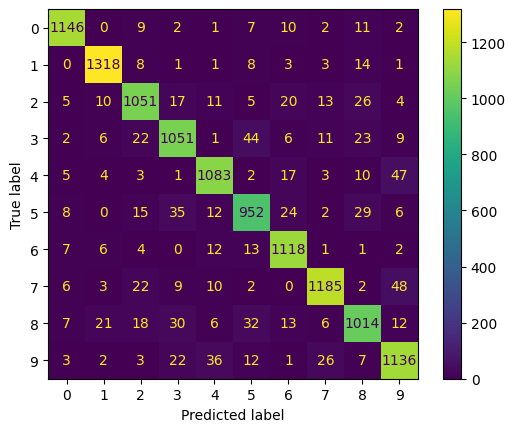

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.metrics import balanced_accuracy_score

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate accuracy
train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.8687318782459


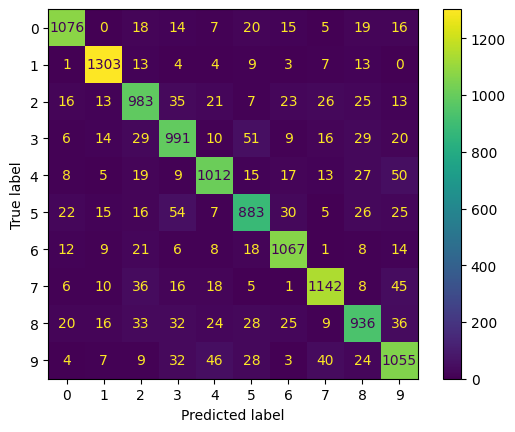

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
dist.plot()
plt.show()

In [22]:
import joblib
joblib.dump(lr, 'lr_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [23]:
def img_to_vec(img_path):
    img_arr = cv2.imread(img_path)
    mean_pixels = np.mean(img_arr,axis=-1).ravel()
    median_pixels = np.median(img_arr,axis=-1).ravel()
    max_pixels = np.max(img_arr,axis=-1).ravel()
    min_pixels = np.min(img_arr,axis=-1).ravel()
    std_pixels = np.std(img_arr,axis=-1).ravel()
    twenty_pixels = np.percentile(img_arr,25,axis=-1).ravel()
    fifty_pixels = np.percentile(img_arr,50,axis=-1).ravel()
    seventy_pixels = np.percentile(img_arr,75,axis=-1).ravel()
    full_img_arr = np.concatenate((mean_pixels,median_pixels,max_pixels,min_pixels,std_pixels,twenty_pixels,fifty_pixels,seventy_pixels),axis=-1)
    return np.array(full_img_arr)

In [24]:
img_path = '/content/mnist_png/training/2/10016.png'
img_arr = img_to_vec(img_path)
img_arr.shape

(6272,)

In [25]:
model = joblib.load('lr_model.joblib')
scaler = joblib.load('scaler.joblib')

In [35]:
def predict_class(vec):
    vec = scaler.transform(vec.reshape(1,-1))
    pred = model.predict(vec)
    prob = np.max(model.predict_proba(vec))
    return str(pred[0]), float(round(prob,3))

In [36]:
pred,prob = predict_class(img_arr)

In [37]:
pred,prob

('2', 0.997)